In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")


Libraries imported successfully.


In [ ]:
df = pd.read_csv('anime.csv')

print("Dataset Shape:", df.shape)

df.head()


Dataset Shape: (10000, 12)


,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


In [ ]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Shape: (10000, 12)

Columns:
 ['anime_id', 'title', 'score', 'rank', 'popularity', 'members', 'synopsis', 'start_date', 'end_date', 'type', 'episodes', 'image_url']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


anime_id      0.00
title         0.00
score         0.00
rank          0.00
popularity    0.00
members       0.00
synopsis      0.02
start_date    0.02
end_date      0.84
type          0.00
episodes      0.48
image_url     0.00
dtype: float64


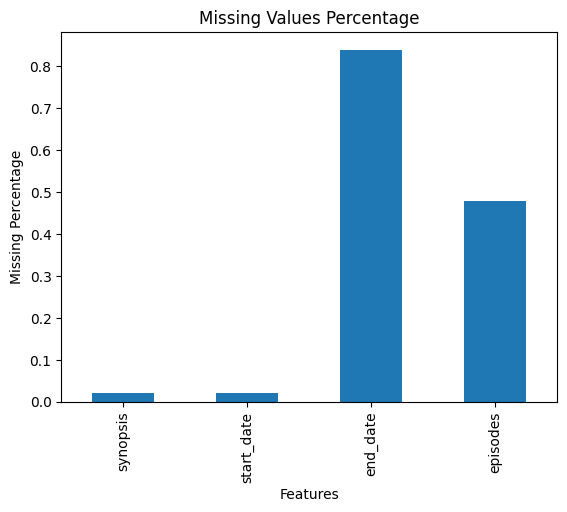

Insight: Missing values are minimal and dataset is reliable.


In [ ]:
missing_percent = df.isnull().mean()*100

print(missing_percent)

plt.figure()
missing_percent[missing_percent>0].plot(kind='bar')
plt.title("Missing Values Percentage")
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.show()

print("Insight: Missing values are minimal and dataset is reliable.")


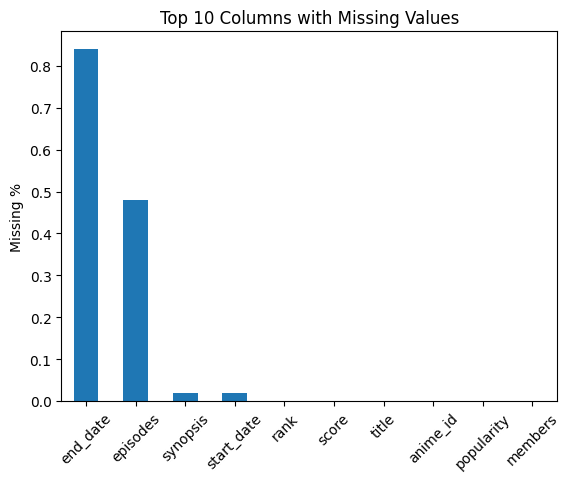

In [ ]:
import matplotlib.pyplot as plt

missing_percent.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Columns with Missing Values")
plt.ylabel("Missing %")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.describe()

,anime_id,score,rank,popularity,members,episodes
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,9952.000000
mean,24129.128000,6.980589,5000.494000,6490.903700,1.075309e+05,15.702271
std,19948.188153,0.619406,2886.898727,4646.309341,2.733514e+05,41.865696
min,1.000000,6.050000,1.000000,1.000000,2.260000e+02,1.000000
25%,4055.500000,6.470000,2500.750000,2591.750000,4.270250e+03,1.000000
50%,21406.000000,6.900000,5000.500000,5564.500000,1.817900e+04,11.000000
75%,40028.750000,7.390000,7500.250000,9824.250000,8.469275e+04,13.000000
max,62863.000000,9.290000,10000.000000,22184.000000,4.262220e+06,1787.000000


In [ ]:
stats = df[['score','members','episodes','rank','popularity']].describe()

print(stats)

print("\nInsight:")
print("Average score:", round(df['score'].mean(),2))
print("Median score:", df['score'].median())


              score       members     episodes          rank    popularity
count  10000.000000  1.000000e+04  9952.000000  10000.000000  10000.000000
mean       6.980589  1.075309e+05    15.702271   5000.494000   6490.903700
std        0.619406  2.733514e+05    41.865696   2886.898727   4646.309341
min        6.050000  2.260000e+02     1.000000      1.000000      1.000000
25%        6.470000  4.270250e+03     1.000000   2500.750000   2591.750000
50%        6.900000  1.817900e+04    11.000000   5000.500000   5564.500000
75%        7.390000  8.469275e+04    13.000000   7500.250000   9824.250000
max        9.290000  4.262220e+06  1787.000000  10000.000000  22184.000000

Insight:
Average score: 6.98
Median score: 6.9


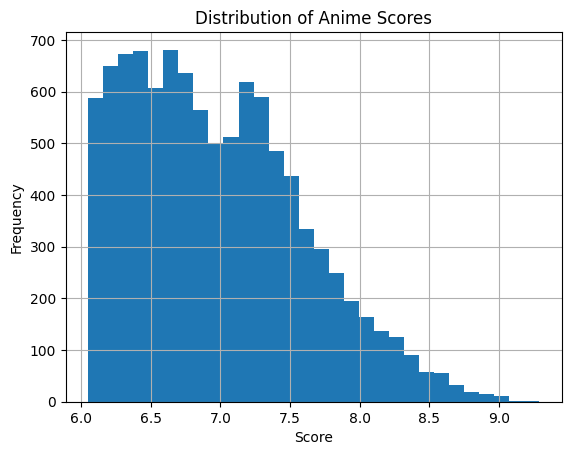

Insight: Most anime scores range between 6.5 and 7.5.


In [ ]:
plt.figure()
df['score'].hist(bins=30)
plt.title("Distribution of Anime Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

print("Insight: Most anime scores range between 6.5 and 7.5.")


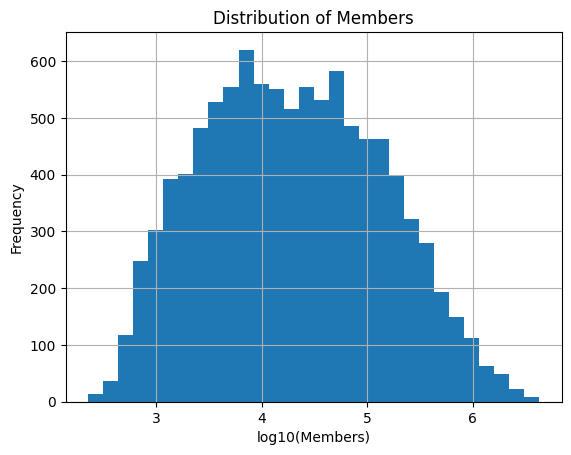

Insight: Popularity is highly skewed.


In [ ]:
plt.figure()
np.log10(df['members']).hist(bins=30)
plt.title("Distribution of Members")
plt.xlabel("log10(Members)")
plt.ylabel("Frequency")
plt.show()

print("Insight: Popularity is highly skewed.")


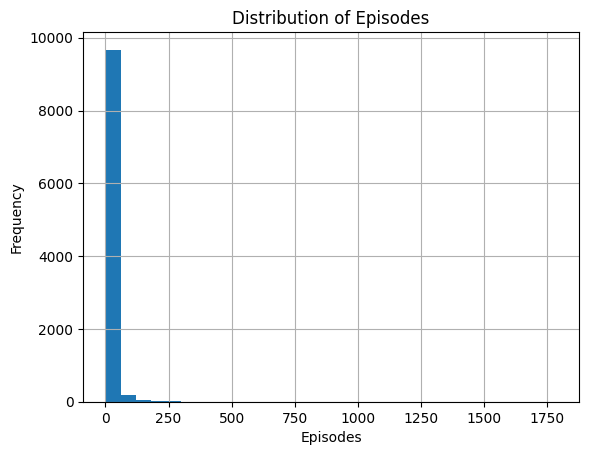

Insight: Most anime have fewer episodes.


In [ ]:
plt.figure()
df['episodes'].hist(bins=30)
plt.title("Distribution of Episodes")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()

print("Insight: Most anime have fewer episodes.")


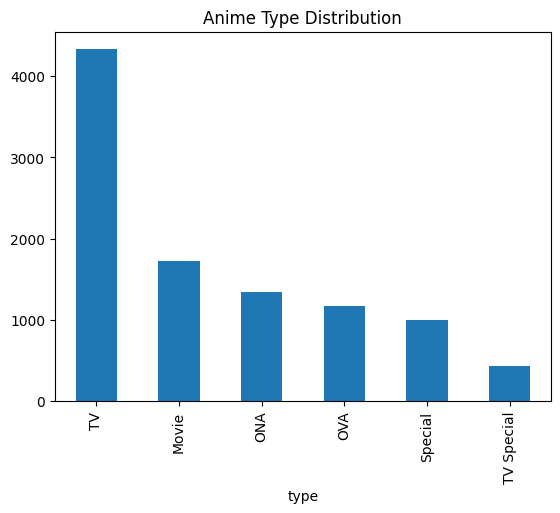

Insight: TV anime dominate.


In [ ]:
type_counts = df['type'].value_counts()

type_counts.plot(kind='bar')
plt.title("Anime Type Distribution")
plt.show()

print("Insight: TV anime dominate.")


               score   members  episodes      rank  popularity
score       1.000000  0.436472  0.028935 -0.976668   -0.590194
members     0.436472  1.000000  0.042455 -0.370155   -0.452963
episodes    0.028935  0.042455  1.000000 -0.026399    0.037194
rank       -0.976668 -0.370155 -0.026399  1.000000    0.601765
popularity -0.590194 -0.452963  0.037194  0.601765    1.000000


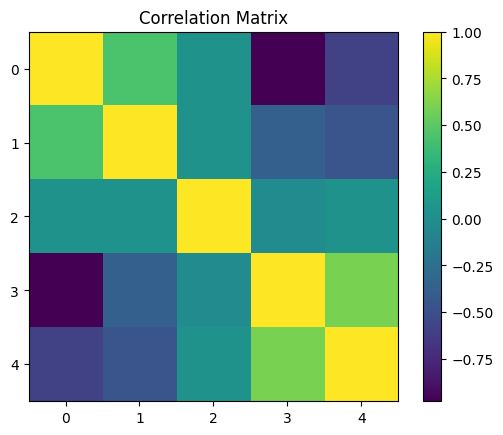

Insight: Popularity moderately affects score.


In [ ]:
corr = df[['score','members','episodes','rank','popularity']].corr()

print(corr)

plt.imshow(corr)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

print("Insight: Popularity moderately affects score.")


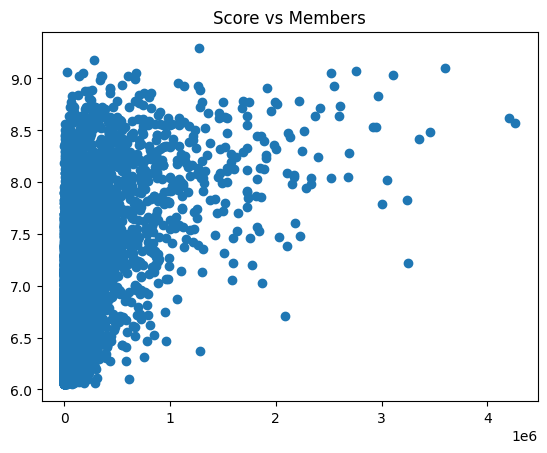

Insight: Popular anime tend to have better ratings.


In [ ]:
plt.scatter(df['members'], df['score'])
plt.title("Score vs Members")
plt.show()

print("Insight: Popular anime tend to have better ratings.")


## Final Conclusion

Key findings:

- Dataset is clean and reliable
- Most anime scores are average
- Popularity is highly skewed
- TV anime dominate industry
- Popularity moderately influences ratings
- Episode count does not influence ratings significantly
